# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [1]:
# Install required packages if not already installed
# 
!pip install requests pandas matplotlib --quiet

In [3]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [5]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [7]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [9]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [11]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.6,99,1.0
1,2023-01-01T01:00,10.6,98,0.1
2,2023-01-01T02:00,10.4,96,0.0
3,2023-01-01T03:00,9.8,95,0.0
4,2023-01-01T04:00,9.1,95,0.0


In [13]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [15]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\Irina Kim\AppData\Local\Temp\ipykernel_11184\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [19]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.448214,86.267857,0.136905
std,3.525340,12.804132,0.431063
min,0.500000,45.000000,0.000000
25%,6.050000,81.000000,0.000000
50%,8.400000,90.000000,0.000000
75%,11.200000,97.000000,0.000000
max,18.000000,100.000000,3.100000


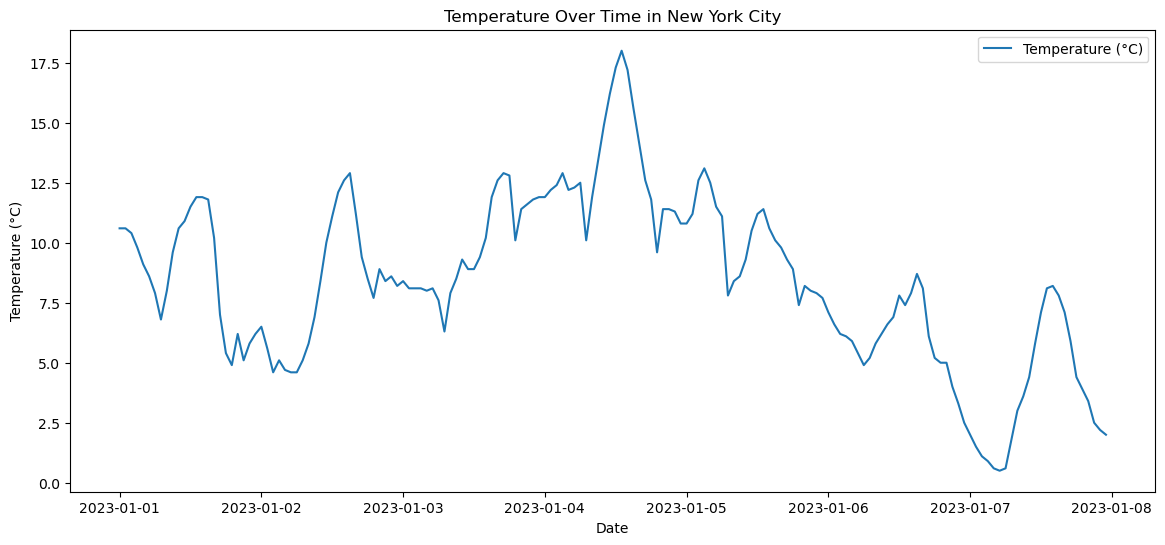

In [21]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

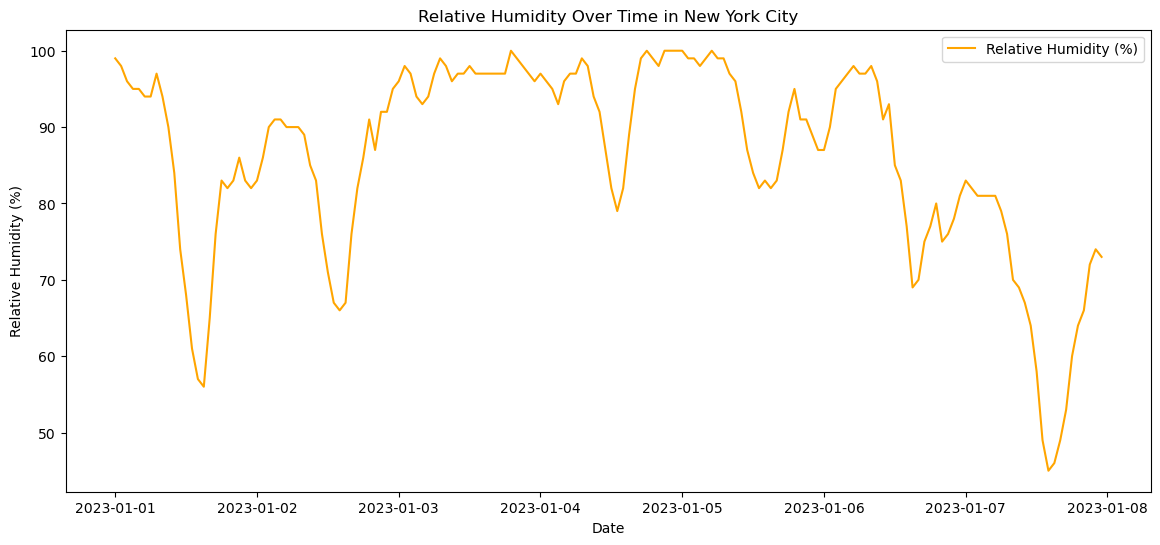

In [23]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


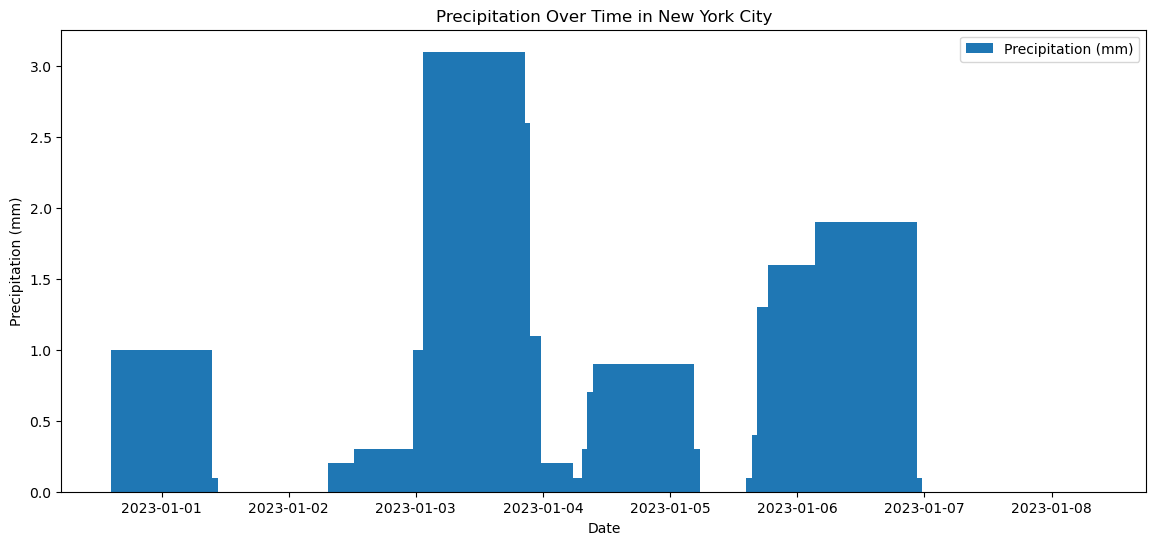

In [25]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [27]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.25


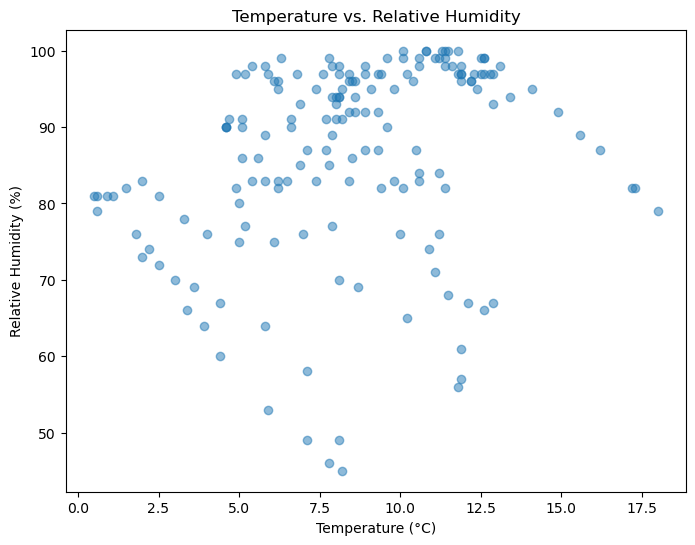

In [29]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [31]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.783333,83.000000,0.045833
2023-01-02,7.979167,84.000000,0.025000
2023-01-03,9.700000,96.916667,0.391667
2023-01-04,13.083333,94.333333,0.095833
2023-01-05,9.912500,92.125000,0.000000


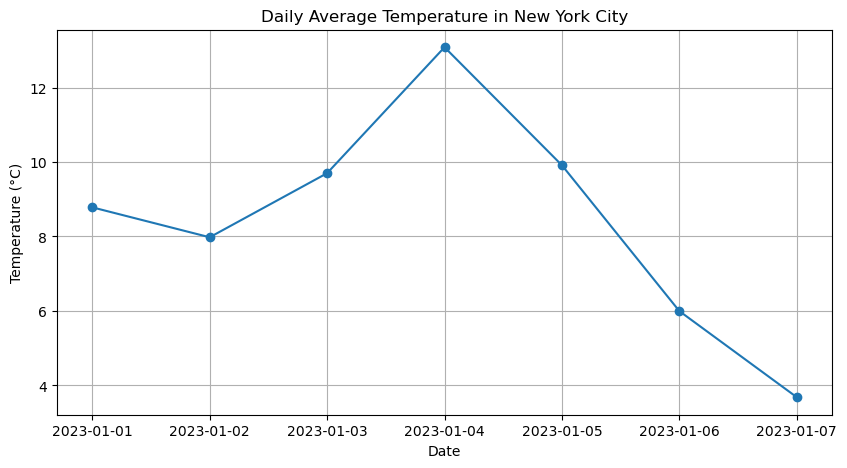

In [33]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [35]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


C:\Users\Irina Kim\AppData\Local\Temp\ipykernel_11184\4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [37]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [39]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


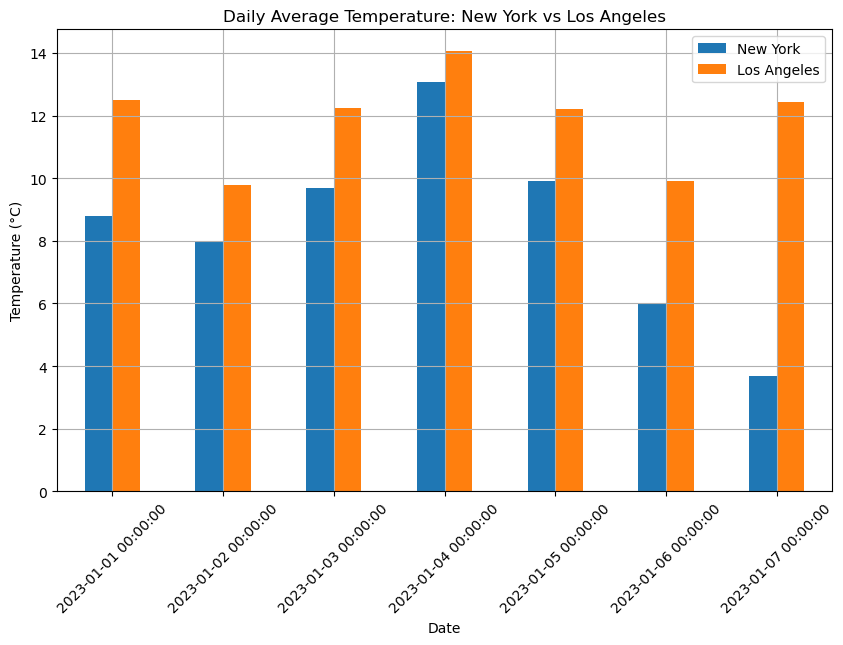

In [41]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [43]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.783333,12.504167,3.720833
2023-01-02,7.979167,9.770833,1.791667
2023-01-03,9.700000,12.245833,2.545833
2023-01-04,13.083333,14.045833,0.962500
2023-01-05,9.912500,12.220833,2.308333
2023-01-06,5.995833,9.925000,3.929167
2023-01-07,3.683333,12.429167,8.745833


In [45]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [48]:
# 1.Fetch Data: Retrieve hourly precipitation data for London and Seattle for the year 2022.
#London Coordinates: Latitude 51.5074, Longitude -0.1278
#Seattle Coordinates: Latitude 47.6062, Longitude -122.3321

import requests
import pandas as pd
import matplotlib.pyplot as plt

def get_rainfall_data(lat, lon, city_name):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": "2022-01-01",
        "end_date": "2022-12-31",
        "hourly": "precipitation",
        "timezone": "GMT"
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame({
            'time': data['hourly']['time'],
            f'{city_name}_precip': data['hourly']['precipitation']
        })
        return df
    else:
        print(f"Failed to fetch data for {city_name}")
        return None

# Fetch data for both cities
london_df = get_rainfall_data(51.5074, -0.1278, 'London')
seattle_df = get_rainfall_data(47.6062, -122.3321, 'Seattle')

In [52]:
#2. Data Cleaning: Convert the time columns to datetime objects and set them as the index. Handle any missing values.

# Merge dataframes on time
df = pd.merge(london_df, seattle_df, on='time')

# Convert to datetime and set index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)



In [86]:
#3. Resample Data: Resample the hourly data to weekly totals.
# Resample to Weekly ('W') and sum the rainfall
weekly_df = df.resample('W').sum()

# Save to CSV for future use
weekly_df.to_csv('london_vs_seattle_rainfall_2022.csv')

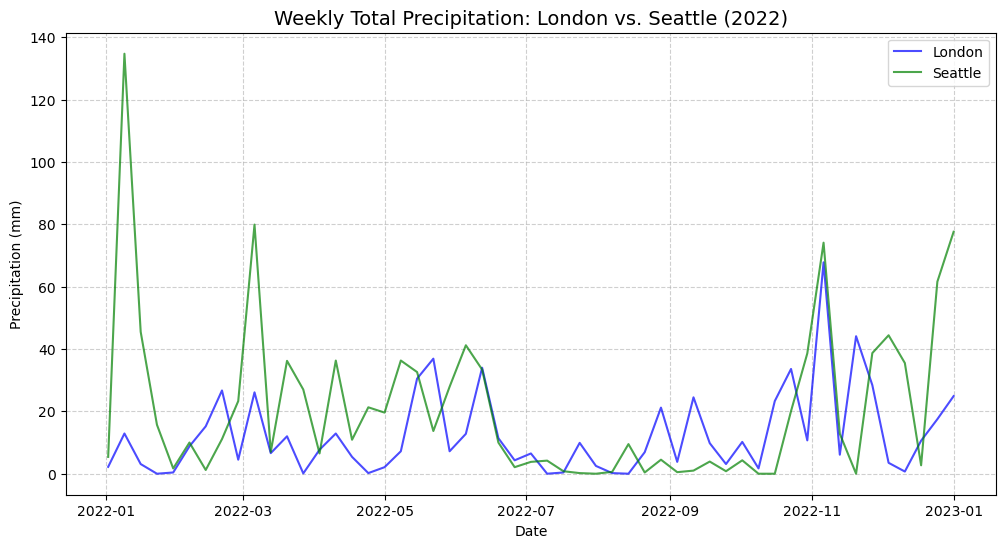

In [54]:
# 4. Visualization: Plot the weekly total precipitation for both cities on the same graph.
plt.figure(figsize=(12, 6))
plt.plot(weekly_df.index, weekly_df['London_precip'], label='London', color='blue', alpha=0.7)
plt.plot(weekly_df.index, weekly_df['Seattle_precip'], label='Seattle', color='green', alpha=0.7)

plt.title('Weekly Total Precipitation: London vs. Seattle (2022)', fontsize=14)
plt.ylabel('Precipitation (mm)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [62]:
#5. Analysis: Determine which city had more rainfall overall and identify any interesting patterns.

import seaborn as sns

london_total = weekly_df['London_precip'].sum()
seattle_total = weekly_df['Seattle_precip'].sum()

print(f"Total Rainfall 2022 - London: {london_total:.2f} mm")
print(f"Total Rainfall 2022 - Seattle: {seattle_total:.2f} mm")

# Hypothesis 1: Testing the "London Myth" (total volume)
if seattle_total > london_total:
    print("Conclusion (Volume): The London myth is busted! Seattle had a higher annual total.")
else:
    print("Conclusion (Volume): This year, London was actually wetter than Seattle.")


Total Rainfall 2022 - London: 663.10 mm
Total Rainfall 2022 - Seattle: 1131.10 mm


Number of Rainy Days in 2022:
London: 189 days
Seattle: 198 days
Conclusion (Gloom): Seattle had more frequent rain days this year.


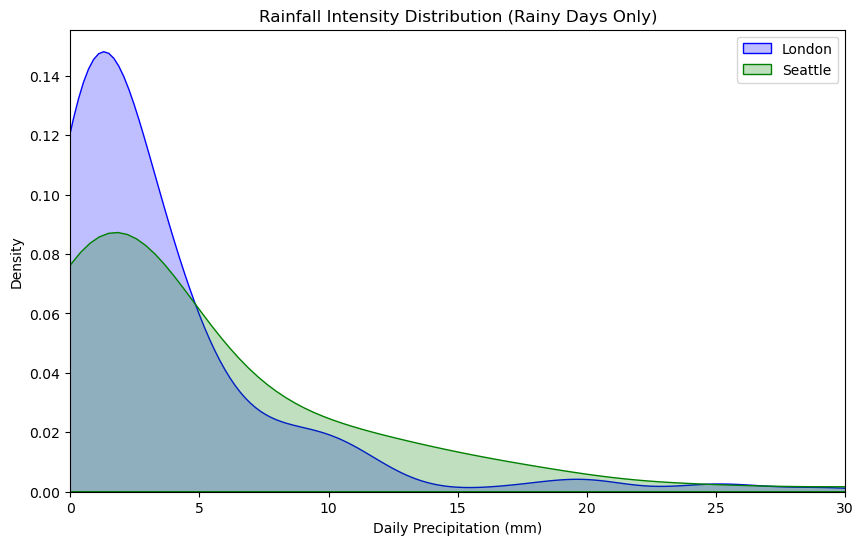

In [64]:
# 6. Interesting facts: testing other hypothesis
    
# Hypothesis 2: [Gloomy factor] Why? London has more rainy or gloomy days? 
# Aggregate hourly data into daily totals
daily_df = df.resample('D').sum()

# Define a "Rainy Day" as any day with more than 0.1mm of precipitation
london_rainy_days = daily_df[daily_df['London_precip'] > 0.1].shape[0]
seattle_rainy_days = daily_df[daily_df['Seattle_precip'] > 0.1].shape[0]

print(f"Number of Rainy Days in 2022:")
print(f"London: {london_rainy_days} days")
print(f"Seattle: {seattle_rainy_days} days")

if london_rainy_days > seattle_rainy_days:
    print("Conclusion (Gloom): London is the 'Gloominess winner' with more frequent rain days.")
else:
    print("Conclusion (Gloom): Seattle had more frequent rain days this year.")



In [ ]:
# Viz: intensity vs frequency
# Filter only for days where it actually rained
london_rain = daily_df.loc[daily_df['London_precip'] > 0.1, 'London_precip']
seattle_rain = daily_df.loc[daily_df['Seattle_precip'] > 0.1, 'Seattle_precip']

plt.figure(figsize=(10, 6))
sns.kdeplot(london_rain, fill=True, label='London', color='blue')
sns.kdeplot(seattle_rain, fill=True, label='Seattle', color='green')

plt.title('Rainfall Intensity Distribution (Rainy Days Only)')
plt.xlabel('Daily Precipitation (mm)')
plt.ylabel('Density')
plt.xlim(0, 30) # Limit x-axis to see the bulk of the data
plt.legend()
plt.show()

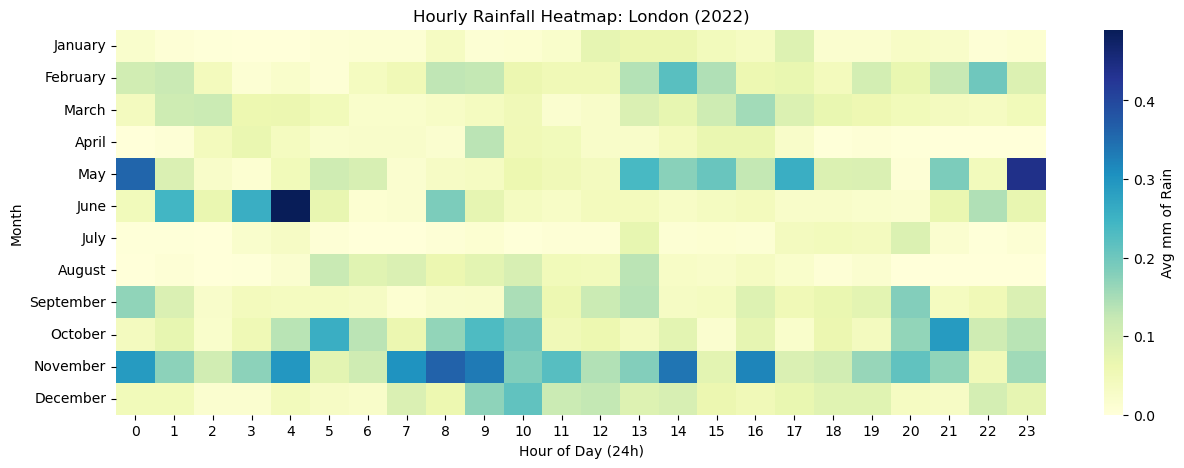

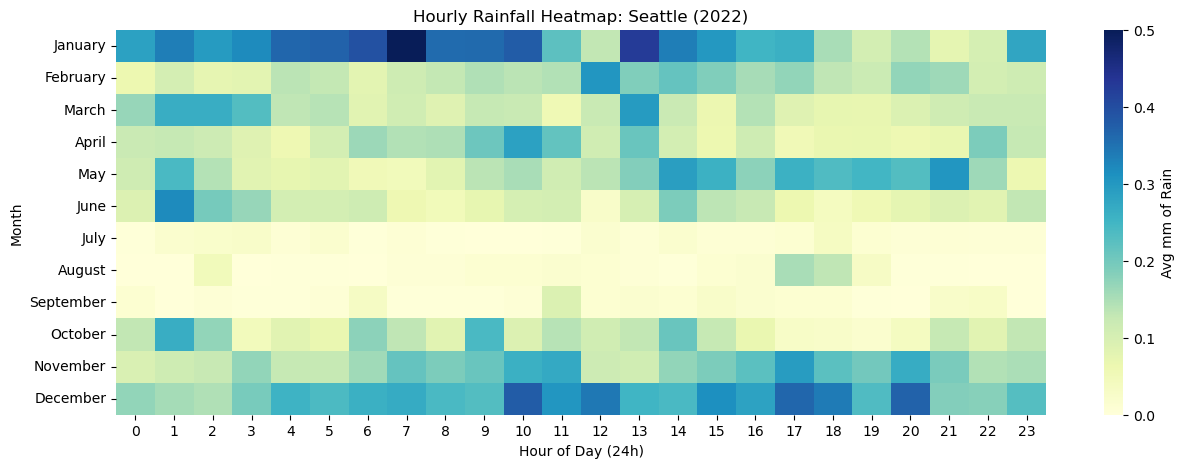

In [80]:
# Viz: heatmap
def create_rain_heatmap(city_col, city_name):
    # Create pivot table: Average precipitation per hour per month
    pivot_table = df.pivot_table(values=city_col, index='month', columns='hour', aggfunc='mean')
    
    # Reorder months
    pivot_table = pivot_table.reindex(month_order)

    plt.figure(figsize=(15, 5))
    sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Avg mm of Rain'})
    plt.title(f'Hourly Rainfall Heatmap: {city_name} (2022)')
    plt.xlabel('Hour of Day (24h)')
    plt.ylabel('Month')
    plt.show()

# Generate heatmaps for both
create_rain_heatmap('London_precip', 'London')
create_rain_heatmap('Seattle_precip', 'Seattle')

monthly_df.to_csv('monthly_rainfall_comparison.csv')

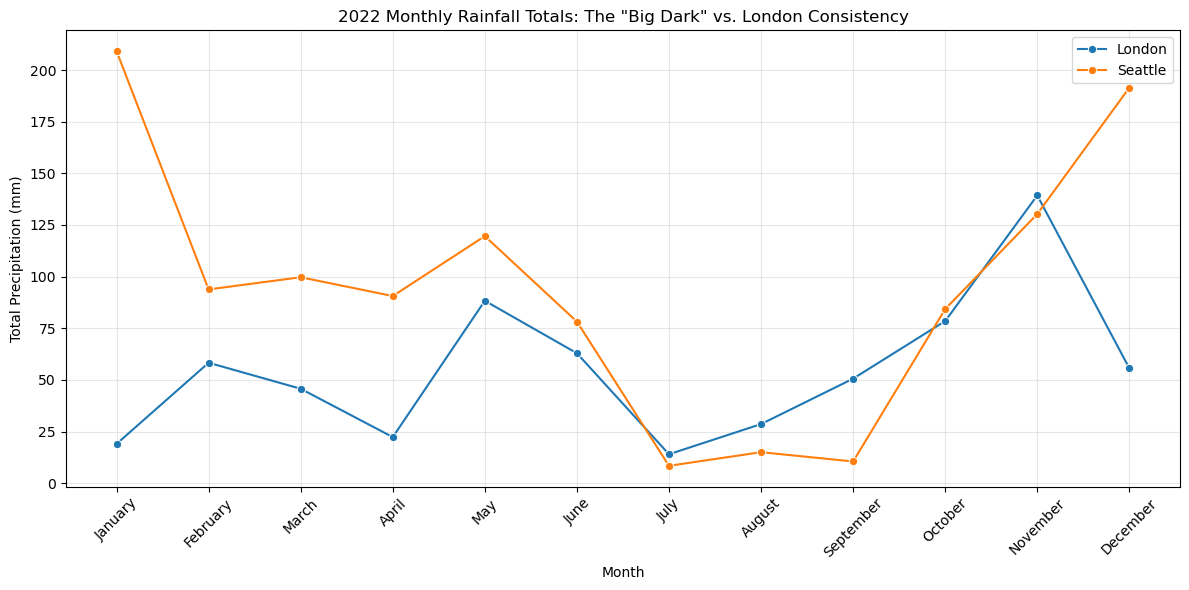

In [84]:
# 7. Seasonality
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your hourly dataframe with 'time', 'London_precip', and 'Seattle_precip'
# 1. Prepare time features
df['month'] = df.index.month_name()
df['hour'] = df.index.hour

# 2. Resample to Monthly Totals
# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_df = df.resample('ME').sum() # Use 'M' or 'ME' depending on pandas version
monthly_df['Month'] = monthly_df.index.month_name()

# 3. Plot Seasonality
plt.figure(figsize=(12, 6))

# Remove group=1 to fix the AttributeError
sns.lineplot(data=monthly_df, x='Month', y='London_precip', marker='o', label='London')
sns.lineplot(data=monthly_df, x='Month', y='Seattle_precip', marker='o', label='Seattle')

plt.title('2022 Monthly Rainfall Totals: The "Big Dark" vs. London Consistency')
plt.ylabel('Total Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
# Calculate the Seasonality Index (Coefficient of Variation)
stats = monthly_df[['London_precip', 'Seattle_precip']].agg(['std', 'mean'])
cv = (stats.loc['std'] / stats.loc['mean']) * 100

print("Seasonality Index (Higher = More Volatile more extreme DRY and WET seasons):")
print(f"London: {cv['London_precip']:.2f}%")
print(f"Seattle: {cv['Seattle_precip']:.2f}%")

Seasonality Index (Higher = More Volatile):
London: 63.84%
Seattle: 68.37%


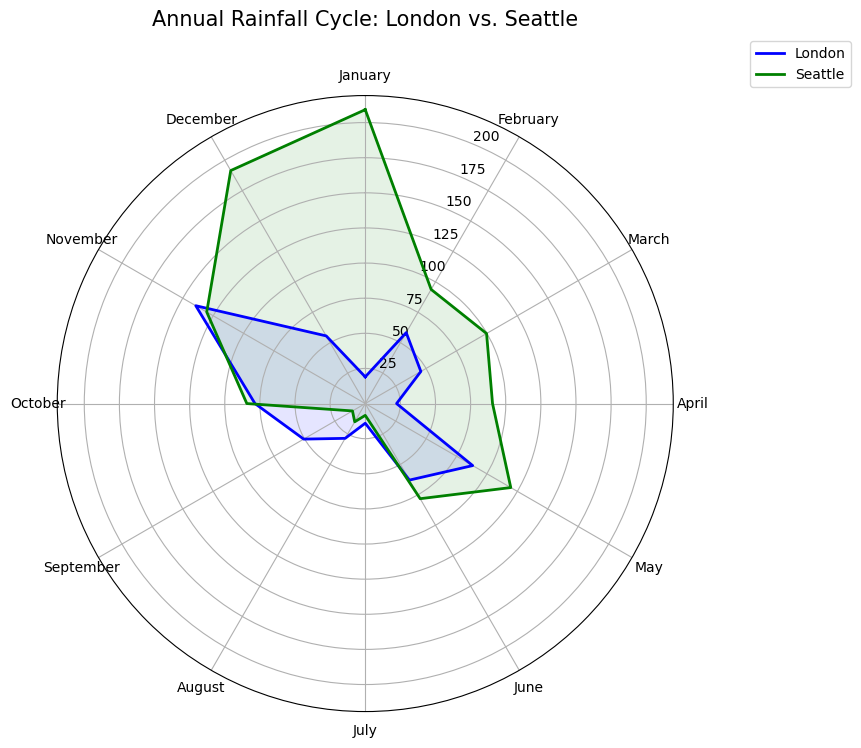

In [76]:
import numpy as np

# 1. Prepare the data
# Ensure monthly_df is sorted by month order
monthly_df['Month_Num'] = pd.to_datetime(monthly_df['Month'], format='%B').dt.month
monthly_df = monthly_df.sort_values('Month_Num')

# 2. Setup the angles (0 to 2*pi)
n_months = 12
angles = np.linspace(0, 2 * np.pi, n_months, endpoint=False).tolist()

# The plot needs to "close the loop," so we append the first value to the end
angles += angles[:1]
london_values = monthly_df['London_precip'].tolist()
london_values += london_values[:1]
seattle_values = monthly_df['Seattle_precip'].tolist()
seattle_values += seattle_values[:1]

# 3. Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw lines
ax.plot(angles, london_values, color='blue', linewidth=2, label='London')
ax.fill(angles, london_values, color='blue', alpha=0.1)

ax.plot(angles, seattle_values, color='green', linewidth=2, label='Seattle')
ax.fill(angles, seattle_values, color='green', alpha=0.1)

# Fix the labels
ax.set_theta_offset(np.pi / 2) # Start at the top (12 o'clock)
ax.set_theta_direction(-1)    # Go clockwise
ax.set_xticks(angles[:-1])
ax.set_xticklabels(month_order)

plt.title('Annual Rainfall Cycle: London vs. Seattle', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()